# Aula 01 - Alunas e alunos com JSON

## Lendo nomes com JSON

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Leitura dos dados json
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [3]:
# Amostras
nomes_f.sample(13)

,nome,regiao,freq,rank,sexo
186,INES,0,85322,187,F
4,ADRIANA,0,565621,5,F
29,RENATA,0,345195,30,F
7,FERNANDA,0,531607,8,F
177,JENIFER,0,88574,178,F
97,BARBARA,0,170703,98,F
128,JOICE,0,127087,129,F
67,PAULA,0,221113,68,F
6,MARCIA,0,551855,7,F
181,IRACEMA,0,87953,182,F


In [4]:
# Amostras
nomes_m.sample(13)

,nome,regiao,freq,rank,sexo
33,JORGE,0,464573,34,M
138,CLEBER,0,102878,139,M
167,ANGELO,0,78108,168,M
99,WILLIAN,0,144078,100,M
79,VALDIR,0,187067,80,M
199,GEOVANE,0,65435,200,M
114,ARTHUR,0,125788,115,M
113,VICENTE,0,125974,114,M
15,BRUNO,0,663271,16,M
108,VALTER,0,131037,109,M


In [5]:
# Quantidade total de nomes
print(f'Quantidade de nomes: {len(nomes_f) + len(nomes_m)}')
print(f'Quantidade de nomes: {nomes_f.shape[0] + nomes_m.shape[0]}')

Quantidade de nomes: 400
Quantidade de nomes: 400


In [6]:
# Concatenando o campo 'nome' dos dataframes
frames = [nomes_f, nomes_m]
nomes = pd.concat(frames, ignore_index=True)['nome'].to_frame()
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
395,WALTER
396,ARLINDO
397,MICHAEL
398,ALVARO


## Incluindo ID dos alunos

In [7]:
import numpy as np
np.random.seed(50)

In [8]:
total_alunos = len(nomes)
total_alunos

400

In [9]:
nomes['id_aluno'] = np.random.permutation(total_alunos)

In [10]:
nomes

,nome,id_aluno
0,MARIA,146
1,ANA,332
2,FRANCISCA,67
3,ANTONIA,362
4,ADRIANA,102
...,...,...
395,WALTER,132
396,ARLINDO,289
397,MICHAEL,109
398,ALVARO,395


In [11]:
# Criando e-mails
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.head(15)

,nome,id_aluno,dominio
0,MARIA,146,@servicodoemail.com
1,ANA,332,@servicodoemail.com
2,FRANCISCA,67,@dominiodoemail.com.br
3,ANTONIA,362,@dominiodoemail.com.br
4,ADRIANA,102,@servicodoemail.com
5,JULIANA,305,@servicodoemail.com
6,MARCIA,219,@servicodoemail.com
7,FERNANDA,97,@servicodoemail.com
8,PATRICIA,382,@dominiodoemail.com.br
9,ALINE,248,@dominiodoemail.com.br


In [12]:
nomes['email'] = (nomes['nome'] + nomes['dominio']).str.lower()
nomes

,nome,id_aluno,dominio,email
0,MARIA,146,@servicodoemail.com,maria@servicodoemail.com
1,ANA,332,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,67,@dominiodoemail.com.br,francisca@dominiodoemail.com.br
3,ANTONIA,362,@dominiodoemail.com.br,antonia@dominiodoemail.com.br
4,ADRIANA,102,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
395,WALTER,132,@dominiodoemail.com.br,walter@dominiodoemail.com.br
396,ARLINDO,289,@dominiodoemail.com.br,arlindo@dominiodoemail.com.br
397,MICHAEL,109,@servicodoemail.com,michael@servicodoemail.com
398,ALVARO,395,@servicodoemail.com,alvaro@servicodoemail.com


# Aula 02 - Criando cursos lendo HTML

## Criando cursos

In [13]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [14]:
# DataFrame de cursos
cursos = cursos[0]
type(cursos)

pandas.core.frame.DataFrame

In [15]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


## Alterando o index

In [16]:
# Renomeando a coluna "Nome do curso"
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [17]:
# Criando id
cursos['id'] = cursos.index + 1
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [18]:
# id como index
cursos = cursos.set_index('id')

In [19]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Aula 03 - Escrevendo CSV, JSON e HTML

## Matriculando alunas e alunos

In [20]:
nomes.sample(5)

,nome,id_aluno,dominio,email
315,MILTON,224,@servicodoemail.com,milton@servicodoemail.com
381,YURI,91,@servicodoemail.com,yuri@servicodoemail.com
218,RAIMUNDO,234,@servicodoemail.com,raimundo@servicodoemail.com
91,CELIA,73,@dominiodoemail.com.br,celia@dominiodoemail.com.br
160,LEILA,307,@servicodoemail.com,leila@servicodoemail.com


In [21]:
# Criando a coluna matriculas (qtd de cursos nos quais os alunos estão matriculadoss)
nomes['matriculas'] = np.ceil((np.random.exponential(size=total_alunos) * 1.5)).astype(int)

In [22]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
309,CELSO,306,@dominiodoemail.com.br,celso@dominiodoemail.com.br,1
3,ANTONIA,362,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
81,MICHELE,387,@servicodoemail.com,michele@servicodoemail.com,3
145,FRANCIELE,177,@dominiodoemail.com.br,franciele@dominiodoemail.com.br,1
211,GABRIEL,352,@servicodoemail.com,gabriel@servicodoemail.com,1


In [23]:
# Estatísticas de matrícula
nomes.matriculas.describe()

count    400.000000
mean       2.032500
std        1.367889
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

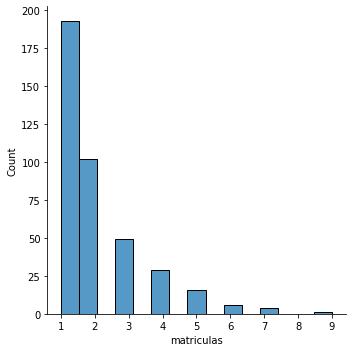

In [24]:
# Gráfico dos matriculados
import seaborn as sns

sns.displot(nomes.matriculas)

In [25]:
# Qtd de matrículas
nomes.matriculas.value_counts()

1    193
2    102
3     49
4     29
5     16
6      6
7      4
9      1
Name: matriculas, dtype: int64

## Selecionando os cursos

In [26]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
356,VALDEMAR,94,@servicodoemail.com,valdemar@servicodoemail.com,2
314,ARTHUR,286,@servicodoemail.com,arthur@servicodoemail.com,1
322,ADAO,344,@dominiodoemail.com.br,adao@dominiodoemail.com.br,2
67,PAULA,100,@dominiodoemail.com.br,paula@dominiodoemail.com.br,2
101,GISELE,264,@dominiodoemail.com.br,gisele@dominiodoemail.com.br,2


In [27]:
cursos.head(20)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [28]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)      # Associa a cada valor de x uma probabilidade de ocorrência

In [29]:
# DataFrame com id do aluno e id dos cursos em que ele está matriculado
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p=prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [30]:
matriculas

,id_aluno,id_curso
0,146,14
1,332,12
2,332,14
3,67,17
4,362,8
...,...,...
808,176,3
809,176,12
810,176,14
811,176,7


In [31]:
# Contando o número de alunos
matriculas.groupby('id_curso').count()

,id_aluno
id_curso,
1,42
2,50
3,28
4,19
5,19
6,45
7,62
8,69
9,48


In [32]:
# Juntando numero de alunos e o nome dos cursos
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'qtd_de_alunos'})
matriculas_por_curso

,qtd_de_alunos,nome_do_curso
id_curso,,
1,42,Lógica de programação
2,50,Java para Web
3,28,C# para Web
4,19,Ruby on Rails
5,19,Cursos de Python
6,45,PHP com MySql
7,62,.NET para web
8,69,Novas integrações com Java
9,48,TDD com Java


In [33]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
182,LIDIANE,214,@servicodoemail.com,lidiane@servicodoemail.com,3
40,APARECIDA,107,@dominiodoemail.com.br,aparecida@dominiodoemail.com.br,3
244,GERALDO,343,@servicodoemail.com,geraldo@servicodoemail.com,2


In [34]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [35]:
matriculas.head()

,id_aluno,id_curso
0,146,14
1,332,12
2,332,14
3,67,17
4,362,8


In [36]:
matriculas_por_curso.head()

,qtd_de_alunos,nome_do_curso
id_curso,,
1,42,Lógica de programação
2,50,Java para Web
3,28,C# para Web
4,19,Ruby on Rails
5,19,Cursos de Python


## Saída em diferentes formatos

In [37]:
# Exportando como CSV
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [38]:
# Exportando como JSON
matriculas_json = matriculas_por_curso.to_json(force_ascii=False)
matriculas_json

'{"qtd_de_alunos":{"1":42,"2":50,"3":28,"4":19,"5":19,"6":45,"7":62,"8":69,"9":48,"10":18,"11":15,"12":82,"13":6,"14":81,"15":53,"16":44,"17":54,"18":70,"19":2,"20":6},"nome_do_curso":{"1":"Lógica de programação","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integrações com Java","9":"TDD com Java","10":"Código limpo com C#","11":"Preparatório para certificação Java","12":"Hardware básico","13":"Persistência com .NET","14":"Desenvolvendo jogos","15":"Análise de dados","16":"Estatística básica","17":"Internet das coisas","18":"Programação funcional","19":"Boas práticas em Java","20":"Orientação objetos com Java"}}'

In [39]:
# Exportando como HTML
matriculas_html = matriculas_por_curso.to_html()

# Aula 04 - Lendo e escrevendo SQL

## Criando o banco SQL

In [40]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [41]:
engine = create_engine('sqlite:///:memory:')
type(engine)

sqlalchemy.engine.base.Engine

In [42]:
# matriculas_por_curso => SQL
matriculas_por_curso.head()

,qtd_de_alunos,nome_do_curso
id_curso,,
1,42,Lógica de programação
2,50,Java para Web
3,28,C# para Web
4,19,Ruby on Rails
5,19,Cursos de Python


In [43]:
matriculas_por_curso.to_sql('matriculas', engine)

20

In [44]:
inspector = inspect(engine)
print(inspector.get_table_names())

['matriculas']


## Buscando no banco de dados

In [45]:
# Criando uma query
query = 'select * from matriculas where qtd_de_alunos < 18'
pd.read_sql(query, engine)

,id_curso,qtd_de_alunos,nome_do_curso
0,11,15,Preparatório para certificação Java
1,13,6,Persistência com .NET
2,19,2,Boas práticas em Java
3,20,6,Orientação objetos com Java


In [46]:
# Selecionando campos da tabela toda
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'qtd_de_alunos'])

,nome_do_curso,qtd_de_alunos
0,Lógica de programação,42
1,Java para Web,50
2,C# para Web,28
3,Ruby on Rails,19
4,Cursos de Python,19
5,PHP com MySql,45
6,.NET para web,62
7,Novas integrações com Java,69
8,TDD com Java,48
9,Código limpo com C#,18


In [47]:
varias_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'qtd_de_alunos'])

In [48]:
query_pandas = 'qtd_de_alunos > 70'
varias_matriculas.query(query_pandas)

,nome_do_curso,qtd_de_alunos
11,Hardware básico,82
13,Desenvolvendo jogos,81


In [49]:
# Escrevendo no banco
varias_matriculas.to_sql('varias_matriculas', con=engine)

20

In [51]:
inspector = inspect(engine)
print(inspector.get_table_names())

['matriculas', 'varias_matriculas']


# Aula 05 - Lendo e escrevendo excel

## Nomes da próxima turma

In [66]:
matriculas_por_curso

,qtd_de_alunos,nome_do_curso
id_curso,,
1,42,Lógica de programação
2,50,Java para Web
3,28,C# para Web
4,19,Ruby on Rails
5,19,Cursos de Python
6,45,PHP com MySql
7,62,.NET para web
8,69,Novas integrações com Java
9,48,TDD com Java


In [67]:
matriculas

,id_aluno,id_curso
0,146,14
1,332,12
2,332,14
3,67,17
4,362,8
...,...,...
808,176,3
809,176,12
810,176,14
811,176,7


In [68]:
id_curso = 16
query = f'id_curso == {id_curso}'
proxima_turma = matriculas.query(query)
proxima_turma.head()

,id_aluno,id_curso
13,97,16
16,29,16
20,37,16
23,77,16
29,390,16


In [69]:
# Incluindo o nome dos alunos
nomes.head(10)

,nome,id_aluno,dominio,email,matriculas
0,MARIA,146,@servicodoemail.com,maria@servicodoemail.com,1
1,ANA,332,@servicodoemail.com,ana@servicodoemail.com,2
2,FRANCISCA,67,@dominiodoemail.com.br,francisca@dominiodoemail.com.br,1
3,ANTONIA,362,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
4,ADRIANA,102,@servicodoemail.com,adriana@servicodoemail.com,1
5,JULIANA,305,@servicodoemail.com,juliana@servicodoemail.com,1
6,MARCIA,219,@servicodoemail.com,marcia@servicodoemail.com,6
7,FERNANDA,97,@servicodoemail.com,fernanda@servicodoemail.com,1
8,PATRICIA,382,@dominiodoemail.com.br,patricia@dominiodoemail.com.br,1
9,ALINE,248,@dominiodoemail.com.br,aline@dominiodoemail.com.br,1


In [70]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
29,16,SANDRA,@servicodoemail.com,sandra@servicodoemail.com,1
36,16,VINICIOS,@servicodoemail.com,vinicios@servicodoemail.com,3
37,16,JESSICA,@servicodoemail.com,jessica@servicodoemail.com,2
43,16,FATIMA,@dominiodoemail.com.br,fatima@dominiodoemail.com.br,3
60,16,ISAIAS,@servicodoemail.com,isaias@servicodoemail.com,6
61,16,CAROLINA,@servicodoemail.com,carolina@servicodoemail.com,3
77,16,LETICIA,@servicodoemail.com,leticia@servicodoemail.com,2
78,16,MOISES,@servicodoemail.com,moises@servicodoemail.com,2
80,16,CRISTIANO,@dominiodoemail.com.br,cristiano@dominiodoemail.com.br,4


In [71]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']
proxima_turma

id_aluno
29         SANDRA
36       VINICIOS
37        JESSICA
43         FATIMA
60         ISAIAS
61       CAROLINA
77        LETICIA
78         MOISES
80      CRISTIANO
86       RAIMUNDA
97       FERNANDA
105        ANGELO
126        ROSANA
130    WELLINGTON
139        SIDNEI
140       LEANDRO
150       LARISSA
151      ANDRESSA
152        ISRAEL
178        LURDES
180         LUCAS
180         LUCAS
188    ALESSANDRA
193      BENEDITO
212    ELIZANGELA
215          JOSE
215          JOSE
221         JAIME
253        ISABEL
258      VALDECIR
259        ELIANE
269        BRENDA
278         ERICK
279         ESTER
300        ADEMIR
304        MANUEL
309       EDILSON
330        BIANCA
350        MIRIAN
371       RICARDO
378         NEUZA
386         ARTUR
387       MICHELE
390       VANESSA
Name: nome, dtype: object

In [72]:
proxima_turma = proxima_turma.to_frame()
proxima_turma

,nome
id_aluno,
29,SANDRA
36,VINICIOS
37,JESSICA
43,FATIMA
60,ISAIAS
61,CAROLINA
77,LETICIA
78,MOISES
80,CRISTIANO


In [75]:
nome_curso = cursos.loc[id_curso]  # id_curso = 16
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [76]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [77]:
nome_curso = {
    'nome': f'Alunos do curso de {nome_curso}'
}

proxima_turma = proxima_turma.rename(columns=nome_curso)
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
29,SANDRA
36,VINICIOS
37,JESSICA
43,FATIMA
60,ISAIAS
61,CAROLINA
77,LETICIA
78,MOISES
80,CRISTIANO


## Escrevendo e lendo excel

In [79]:
# Escrevendo
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [80]:
# Lendo
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,SANDRA
1,VINICIOS
2,JESSICA
3,FATIMA
4,ISAIAS
5,CAROLINA
6,LETICIA
7,MOISES
8,CRISTIANO
9,RAIMUNDA
